In [1]:
# Importing necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# **Data Ingestion** 
---

In [2]:
# Reading the excel file
data = pd.read_excel('data/customer_churn_large_dataset.xlsx')

In [3]:
data.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


# **Data Briefing** 
---

In [4]:
# Determining datatypes and other information about features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
# Checking presence of null values
print(data.isna().sum())

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


Wow, no null values

In [7]:
# Determining the number of unique values each categorical column has
uniqueness_report = {column: len(data[column].unique()) for column in data.columns if data[column].dtype == 'object'}
print(uniqueness_report)

{'Name': 100000, 'Gender': 2, 'Location': 5}


`Name` and `CustomerID` is **insignificant** in building model so we will drop Name and CustomerID

In [8]:
# Dropping the first two columns 
data_updated = data.iloc[:, 2:]

In [9]:
data_updated.head(10)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
5,67,Male,New York,15,82.65,456,1
6,30,Female,Chicago,3,73.79,269,0
7,67,Female,Miami,1,97.70,396,1
8,20,Female,Miami,10,42.45,150,1
9,53,Female,Los Angeles,12,64.49,383,1


# **Data Transformation**
---

In [10]:
# Label Encoding the Gender feature
# Male: 0 and Female: 1
data_updated['Gender'] = data_updated['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
# OneHotEncoding the Location column.
ohe = OneHotEncoder()
data_updated = pd.concat([data_updated, pd.DataFrame(ohe.fit_transform(data_updated[['Location']]).toarray(), columns = ohe.get_feature_names_out()).astype('int')], axis = 1)

In [13]:
# Dropping the previous Location column
data_updated.drop('Location', axis = 1, inplace = True)

In [14]:
data_updated.head(10)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,0,17,73.36,236,0,0,0,1,0,0
1,62,1,1,48.76,172,0,0,0,0,0,1
2,24,1,5,85.47,460,0,0,0,1,0,0
3,36,1,3,97.94,297,1,0,0,0,1,0
4,46,1,19,58.14,266,0,0,0,0,1,0
5,67,0,15,82.65,456,1,0,0,0,0,1
6,30,1,3,73.79,269,0,1,0,0,0,0
7,67,1,1,97.70,396,1,0,0,0,1,0
8,20,1,10,42.45,150,1,0,0,0,1,0
9,53,1,12,64.49,383,1,0,0,1,0,0


# **Saving the Transformed File**
---

In [15]:
# Saving the updated excel file to the given address
data_updated.to_excel('data/churn_data_updated.xlsx', index = False)

In [16]:
# Finally checking the updated dataset
print(data_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int64  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
 6   Location_Chicago            100000 non-null  int32  
 7   Location_Houston            100000 non-null  int32  
 8   Location_Los Angeles        100000 non-null  int32  
 9   Location_Miami              100000 non-null  int32  
 10  Location_New York           100000 non-null  int32  
dtypes: float64(1), int32(5), int64(5)
memory usage: 6.5 MB
None


e:\Python_Models\Customer_Churn_Prediction\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


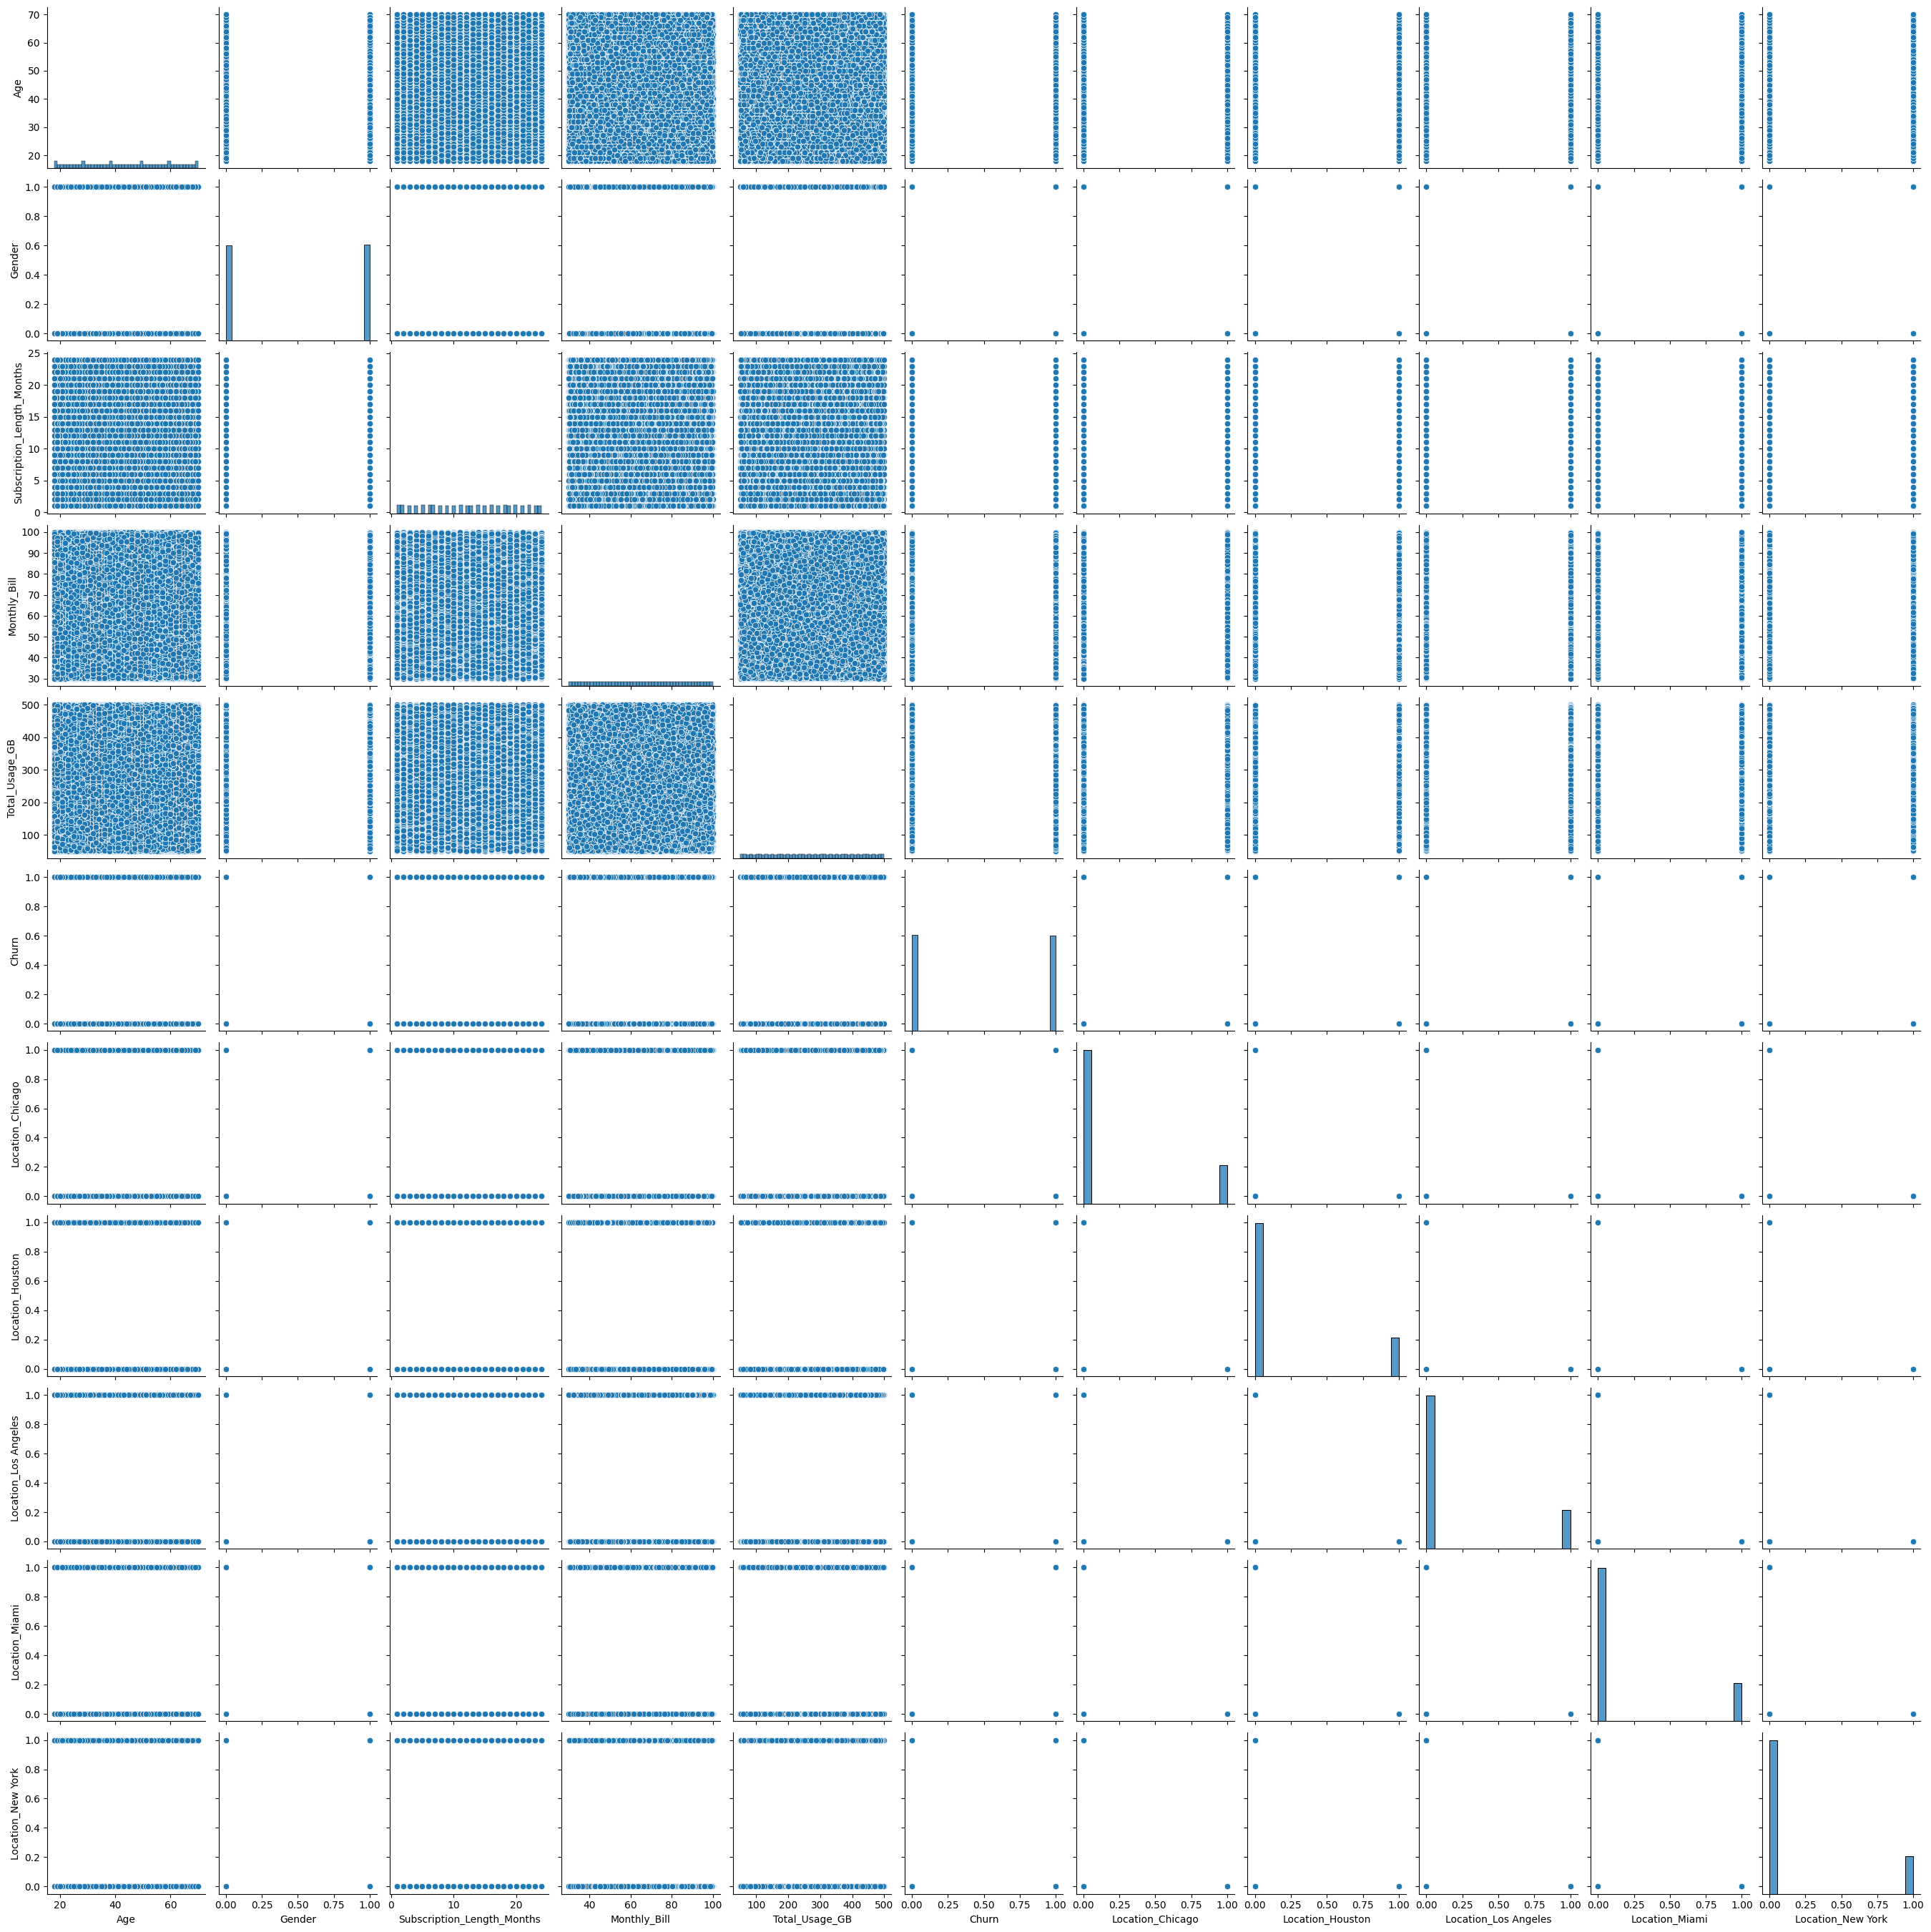

In [19]:
sns.pairplot(data = data_updated)
plt.show()

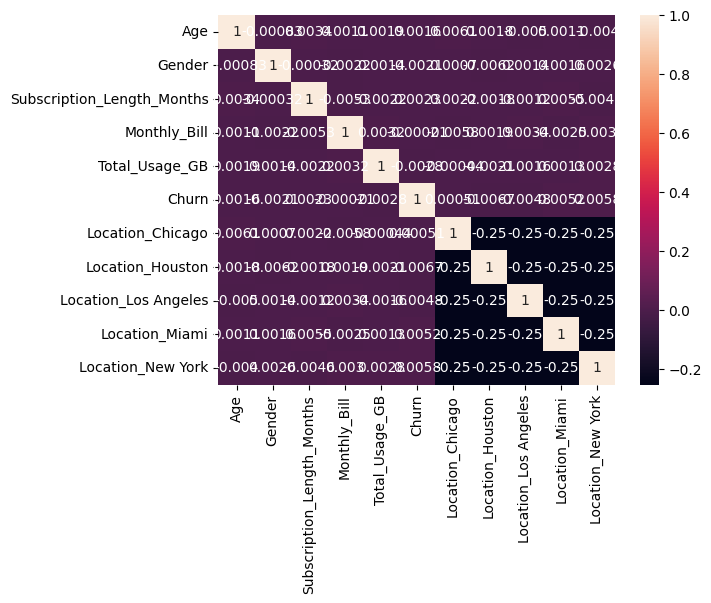

In [20]:
sns.heatmap(data_updated.corr(), annot = True)
plt.show()

There is no correlation among the features. Thus these features are independent from each other.
So now we can start training our model in the model_training notebook.